# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


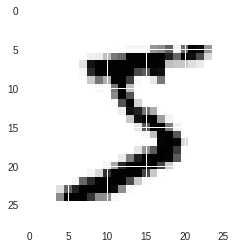

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

#model.add(Convolution2D(32, 5, padding= 'SAME', activation='relu', input_shape=(28,28,1))) # -----
#model.add(Convolution2D(12, 3, activation='relu'))#filter size 24,3x3x32, out 26x26x12   #
#model.add(Convolution2D(10, 3, activation='relu'))#filter size 10,3x3x12, out 24x24x10   # tot params 19800
#model.add(MaxPooling2D(pool_size=(2, 2)))#out 12x12x10                                   # 
#model.add(Convolution2D(10,12, activation='relu'))#filter size 10,12x12x10,  out 1x1x10  #------

#model.add(Convolution2D(32, 3, padding= 'SAME', activation='relu', input_shape=(28,28,1))) #filter 3x3x1 , out, 28x28x32----
#model.add(Convolution2D(10, 1, activation='relu')) #filter 1x1x32, out 28x28x10 ; 12,1
#model.add(MaxPooling2D(pool_size=(2, 2)))#out 14x14x10; 14
#model.add(Convolution2D(10, 14))                           #### tot params 20,260, acc 98.07
#model.add(Flatten())
#model.add(Activation('softmax')) #-------

model.add(Convolution2D(32, 3, padding= 'SAME', activation='relu', input_shape=(28,28,1))) #filter 3x3x1 , out, 28x28x32----
model.add(Convolution2D(12, 1, activation='relu')) #filter 1x1x32, out 28x28x12 ; 12,1
model.add(Convolution2D(10,3, activation='relu')) #filter 3x3x12, out 26x26x10             # tot params 18716, acc 98.57
model.add(MaxPooling2D(pool_size=(2, 2)))#out 13x13x10; 14
model.add(Convolution2D(10, 13)) 
model.add(Flatten())
model.add(Activation('softmax'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 12)        396       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 10)        1090      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 1, 10)          16910     
_________________________________________________________________
flatten_5 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total para

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [41]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.1999 - acc: 0.9407
Epoch 2/10
57824/60000 [===========================>..] - ETA: 0s - loss: 0.0725 - acc: 0.9778

60000/60000 [==============================] - 19s 319us/step - loss: 0.0723 - acc: 0.9779
Epoch 3/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0542 - acc: 0.9838
Epoch 4/10
20192/60000 [=========>....................] - ETA: 12s - loss: 0.0420 - acc: 0.9871

60000/60000 [==============================] - 19s 320us/step - loss: 0.0436 - acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0367 - acc: 0.9888
Epoch 6/10
 9248/60000 [===>..........................] - ETA: 16s - loss: 0.0294 - acc: 0.9893

60000/60000 [==============================] - 19s 315us/step - loss: 0.0318 - acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0267 - acc: 0.9913
Epoch 8/10
 6624/60000 [==>...........................] - ETA: 16s - loss: 0.0182 - acc: 0.9952

60000/60000 [==============================] - 19s 319us/step - loss: 0.0225 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0204 - acc: 0.9934
Epoch 10/10
 4768/60000 [=>............................] - ETA: 17s - loss: 0.0101 - acc: 0.9975

60000/60000 [==============================] - 19s 318us/step - loss: 0.0181 - acc: 0.9938


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [43]:
print(score)

[0.055169279017898046, 0.9857]


In [0]:
model_dict = dict() #dictionary holding validation accuracy corresponding to each architecture

def filtersize(idx):#outputs wrong filter size & total parameter values if Stride!=1, Padding!=0
  st=1 #stride=1
  pd= 0#padding=0
  if idx==0:
    fn = int(model.layers[0].output.shape[3])
    fx = int(model.input.shape[1]) - (int(model.layers[0].output.shape[1]) -1)*st +2*pd #f_out = (f_in - filter + 2*Pad)/Stride + 1
    fy = fx
    fz = int(model.input.shape[3])
  else:
    fn= int(model.layers[idx].output.shape[3])
    fx= int(model.layers[idx-1].output.shape[1]) - (int(model.layers[idx].output.shape[1]) -1)*st +2*pd
    fy = fx
    fz= int(model.layers[idx-1].output.shape[3])
  return (fn,fx,fy,fz, fn*(fx*fy*fz +1))

def filterlist(arg):#returns a tuple of filter sizes list and total parameters #outputs wrong filter size & total parameter values if Stride!=1, Padding!=0
  flist = [] #filter list
  tot_params=0
  for i in list(range(len(arg.layers)-2)):#for i in range(len(arg.layers)-1):    
    flist.append(filtersize(i))
    tot_params += flist[i][-1]
  return (flist,tot_params)
  

In [48]:
model_dict.update({score[1]:filterlist(model)})
print(model_dict) #outputs wrong filter size & total parameter values if Stride!=1, Padding!=0

{0.9806: ([(32, 3, 3, 1, 320), (10, 1, 1, 32, 330), (10, 26, 26, 10, 67610)], 68260), 0.7935: ([(32, 3, 3, 1, 320), (10, 1, 1, 32, 330), (20, 4, 4, 10, 3220), (12, 12, 12, 20, 34572), (10, 12, 12, 12, 17290)], 55732), 0.9857: ([(32, 1, 1, 1, 64), (12, 1, 1, 32, 396), (10, 3, 3, 12, 1090), (10, 14, 14, 10, 19610), (10, 13, 13, 10, 16910)], 38070)}


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[5.4262240e-20 7.4995264e-21 2.9226609e-15 2.7465671e-10 3.1048483e-23
  5.9180276e-16 8.4475121e-32 1.0000000e+00 2.3254890e-13 3.6574750e-13]
 [1.9818867e-12 1.9160572e-13 1.0000000e+00 1.8730238e-11 4.4340833e-26
  7.0348320e-16 7.6396152e-09 4.5253342e-26 4.2462809e-14 4.7476848e-19]
 [2.0239463e-06 9.9918586e-01 1.7631210e-05 3.1694347e-07 9.6826116e-05
  1.4722149e-08 7.0736505e-08 2.2394136e-06 6.9500820e-04 1.3599256e-08]
 [1.0000000e+00 3.0017725e-19 9.6389403e-09 1.2447670e-15 1.7136059e-17
  1.1237075e-13 2.3280830e-11 2.3914520e-11 2.5361048e-12 5.9785496e-14]
 [2.4925019e-12 7.6650493e-17 3.1951902e-12 1.1396074e-10 9.9999738e-01
  1.9545641e-15 1.7381618e-13 4.6282006e-12 8.2257525e-09 2.6133657e-06]
 [4.4985013e-10 9.9977452e-01 1.5086118e-07 8.6312095e-09 1.8687491e-06
  2.2945242e-12 1.8145245e-10 2.4338719e-05 1.9909813e-04 9.7944621e-09]
 [1.0908854e-17 8.3556356e-12 3.2693956e-07 3.3718521e-11 9.9826616e-01
  4.7737707e-09 1.5633739e-15 1.7127068e-07 1.7290075e-03 

In [51]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_5': <keras.layers.core.Activation at 0x7f0bd2d5dd68>,
 'conv2d_15': <keras.layers.convolutional.Conv2D at 0x7f0bd40c15c0>,
 'conv2d_16': <keras.layers.convolutional.Conv2D at 0x7f0bd34a7860>,
 'conv2d_17': <keras.layers.convolutional.Conv2D at 0x7f0bd34a7cc0>,
 'conv2d_18': <keras.layers.convolutional.Conv2D at 0x7f0bd32a5940>,
 'flatten_5': <keras.layers.core.Flatten at 0x7f0bd2d50ac8>,
 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D at 0x7f0bd32bb470>}

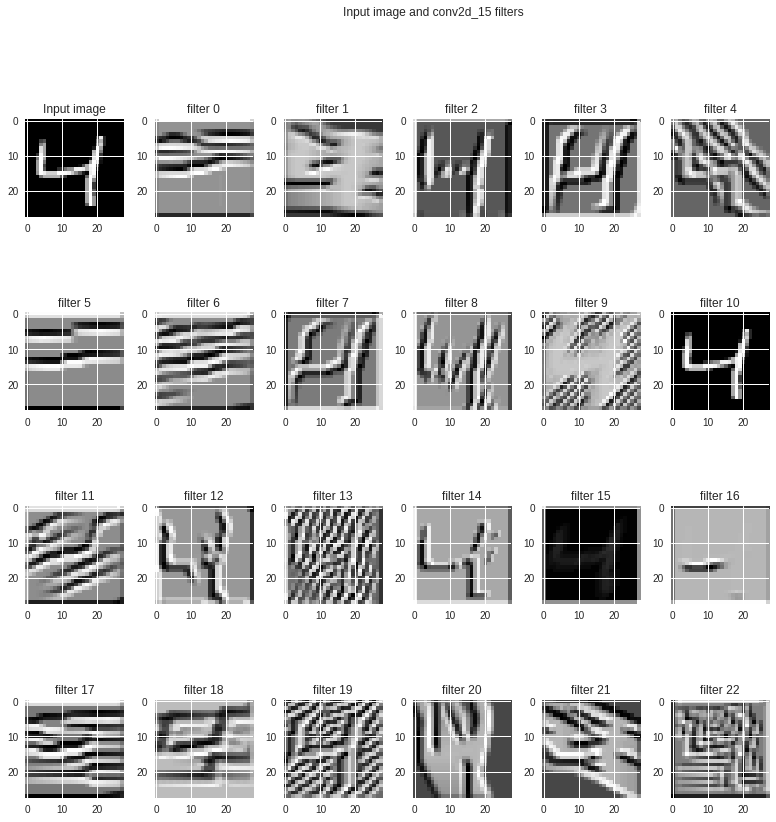

In [52]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_15'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()